In [1]:
from sklearn import svm
import numpy as np, pandas as pd, os
from prettytable import PrettyTable
from matplotlib import pyplot as plt

In [2]:
# -------------------- Globals and Configs -------------------- #
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('../datasets/csv/train.csv')
testing_input_file = os.path.abspath('../datasets/csv/test.csv')

np.random.seed(666)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [3]:
# -------------------- Data -------------------- #

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

if __name__ == '__main__':
    tab = PrettyTable(['Config', 'Value'])
    configs = vars(config)

    for key in configs:
        tab.add_row([key, configs[key]])
    print(tab)


+----------+-------+
|  Config  | Value |
+----------+-------+
| classes  |   10  |
| features |   10  |
+----------+-------+


In [4]:
# -------------------- Model -------------------- #
model = svm.SVC()
print("Generated model! Going to train...")

# Training
model.fit(train_x, train_y)
print("Done training! Going to test...")

# Testing
testLen = len(test_x)
predictions = list()
for l in range(testLen):
    predictions.append(model.predict([test_x[l]])[0])
    if l == (testLen // 4) or l == (testLen // 2) or l == ((testLen*3) // 4):
        print("Quarter done")

print("Generated predictions!")

Generated model! Going to train...
Done training! Going to test...
Quarter done
Quarter done
Quarter done
Generated predictions!


In [5]:
import math

avgError = sum([math.fabs(x-y) for x, y in zip(predictions, test_y)]) / len(predictions)
print("Average error :", avgError)

rmsError = sum([(x-y)**2 for x, y in zip(predictions, test_y)]) / len(predictions)
rmsError = math.sqrt(rmsError)
print("RMSE :", rmsError)

Average error : 0.476125
RMSE : 0.8120080048866514


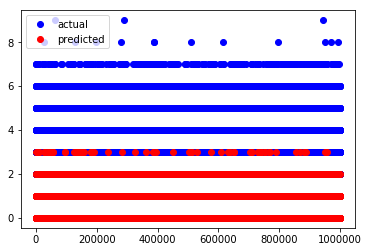

In [6]:
plt.plot(test_y, 'bo', label='actual')
plt.plot(predictions, 'ro', label='predicted')
plt.legend()
plt.show()

In [9]:
preds = predictions
confMat = [[0] * config.classes for x in range(config.classes)]
acc = 0

for i in range(len(preds)):
    predLabel = preds[i]
    actLabel = test_y[i]
    confMat[actLabel][predLabel] += 1
    if predLabel == actLabel:
        acc += 1

header = [""]
for l in range(config.classes):
    header.append("Pred " + str(l))
    
tab = PrettyTable(header)
l = 0
for c in confMat:
    tab.add_row(["Real " + str(l)] + c)
    l += 1

print(tab)
print("Accuracy :", acc * 100 / len(preds))

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 | Pred 5 | Pred 6 | Pred 7 | Pred 8 | Pred 9 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Real 0 | 368338 | 132865 |   6    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 1 | 204381 | 217693 |  405   |   19   |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 2 | 16182  | 31081  |  339   |   20   |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 3 |  2973  | 17986  |  144   |   18   |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 4 |   49   |  3808  |   28   |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 5 |  1595  |  401   |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 6 |  138   |  1222  |   63   |   1    |   0    |   0    |   0    |   0    |   0    |